In [2]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



In [3]:
# reading the data frame

df = pd.read_excel("C:\\Users\\u\Desktop\\Mall_Customers.xlsx")

In [4]:
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# shape of our dataset: 
df.shape 

# statistical analysis of our dataset: 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Checking type of columns present in our dataset: 
df.dtypes 

# Checking number of rows and columns present in the dataset: 
df.info() 

# check any null values present in the dataset:
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# drop the CustomerID column:

df.drop(['CustomerID'], axis = 1, inplace= True)

# checking the modified dataset:

df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
import seaborn as sns

C:\Users\u\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


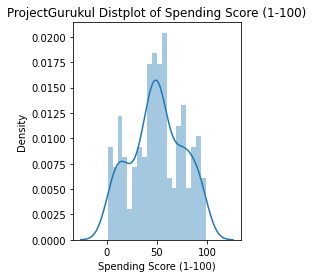

In [9]:
plt.figure(1, figsize=(12,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
 n+=1
plt.subplot(1,3,n)
plt.subplots_adjust(hspace= 0.5, wspace=0.5)
sns.distplot(df[x], bins = 20)
plt.title('ProjectGurukul Distplot of {}'.format(x))
plt.show()

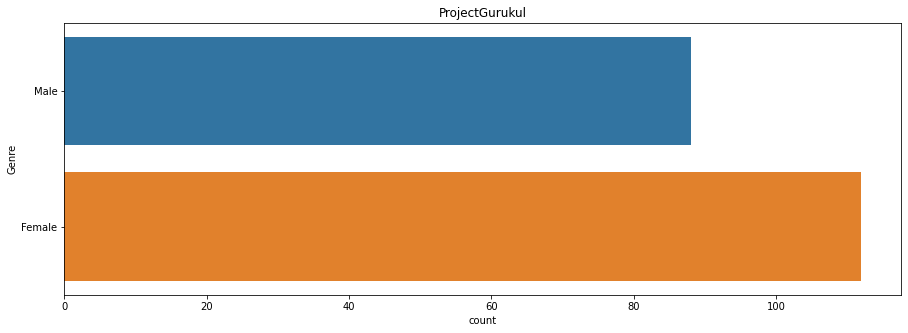

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'Genre' , data = df)
plt.title('ProjectGurukul')
plt.show()

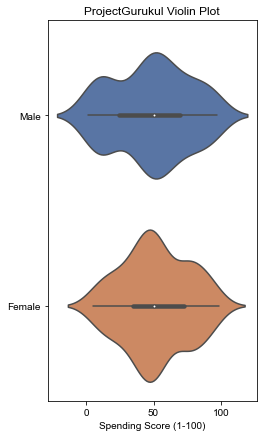

In [11]:
plt.figure(1, figsize=(15,7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
 n+=1
plt.subplot(1,3,n)
sns.set(style = 'whitegrid')
plt.subplots_adjust(hspace= 0.5, wspace=0.5)
sns.violinplot(x = cols,y = 'Genre', data = df)
plt.ylabel('Genre' if n==1 else '')
plt.title('ProjectGurukul Violin Plot')
plt.show()

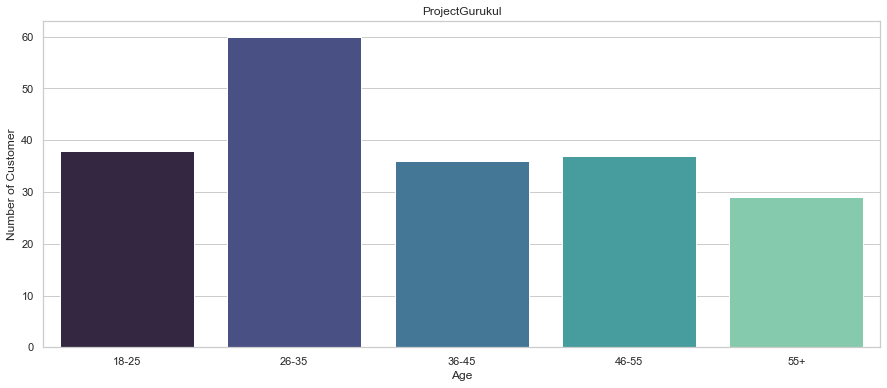

In [12]:
# Creating group of ages:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_above_55 = df.Age[(df.Age >= 56)]

agex = ['18-25', '26-35', '36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey , palette='mako')
plt.title('ProjectGurukul')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

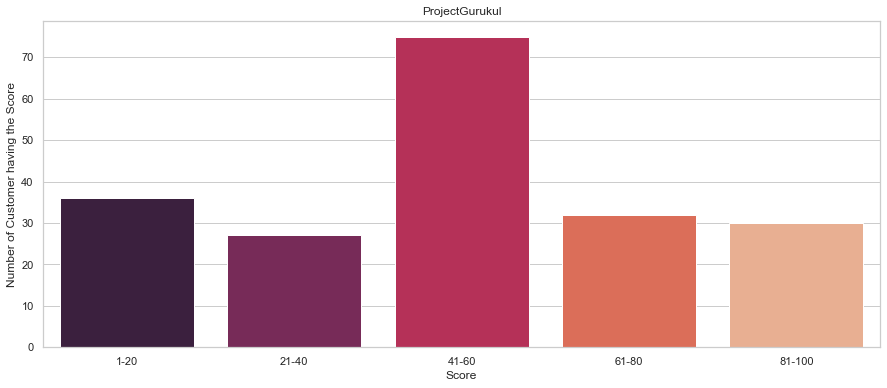

In [13]:
# Creating groups of ‘Spending Score’ column and visualizing it:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

ssx = ['1-20','21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = ssx, y = ssy, palette='rocket')
plt.title('ProjectGurukul')
plt.xlabel('Score')
plt.ylabel('Number of Customer having the Score')
plt.show()

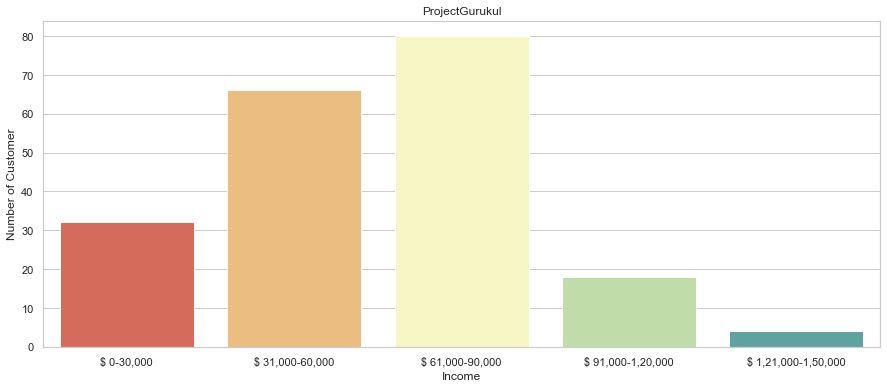

In [14]:
# Creating groups for ‘Annual Income’ column and visualizing it:

ann_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0 ) & (df['Annual Income (k$)'] <= 30)]
ann_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31 ) & (df['Annual Income (k$)'] <= 60)]
ann_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61 ) & (df['Annual Income (k$)'] <= 90)]
ann_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91 ) & (df['Annual Income (k$)'] <= 120)]
ann_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121 ) & (df['Annual Income (k$)'] <= 150)]

annx = ['$ 0-30,000','$ 31,000-60,000','$ 61,000-90,000','$ 91,000-1,20,000','$ 1,21,000-1,50,000']
anny = [len(ann_0_30.values),len(ann_31_60.values),len(ann_61_90.values),len(ann_91_120.values),len(ann_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = annx, y = anny, palette='Spectral')
plt.title('ProjectGurukul')
plt.xlabel('Income')
plt.ylabel('Number of Customer')
plt.show()

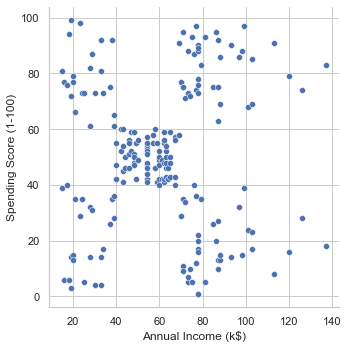

In [15]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)

[1 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 1 1 0 2 1 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0
 2 0 2 3 2 3 1 0 1 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 2 1 2 3 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 3 2
 0 2 0 2 0 2 0 2 0 2 0 2 3 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[43.29166667 15.02083333]
 [27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


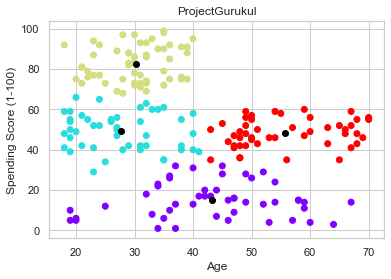

In [27]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)

print(label)

print(kmeans.cluster_centers_)

# Visualize our clusters(basically different groups):

plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('ProjectGurukul')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 3 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
[[86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


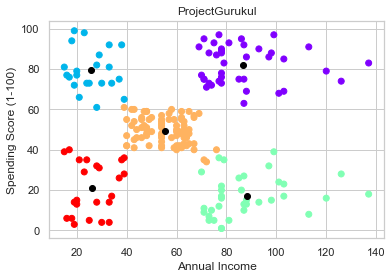

In [31]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X2)

print(label)

print(kmeans.cluster_centers_)

# visualize clusters:

plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_,cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('ProjectGurukul')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

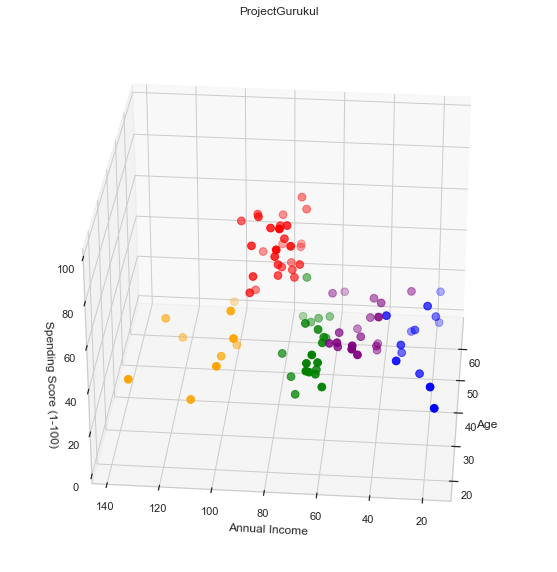

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

clusters = kmeans.fit_predict(X3)
df['label'] = clusters


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df['Annual Income (k$)'][df.label == 0], df['Spending Score (1-100)'][df.label == 0], c = 'blue', s = 60)
ax.scatter(df.Age[df.label == 1], df['Annual Income (k$)'][df.label == 1], df['Spending Score (1-100)'][df.label == 1], c = 'red', s = 60)
ax.scatter(df.Age[df.label == 2], df['Annual Income (k$)'][df.label == 2], df['Spending Score (1-100)'][df.label == 2], c = 'green', s = 60)
ax.scatter(df.Age[df.label == 3], df['Annual Income (k$)'][df.label == 3], df['Spending Score (1-100)'][df.label == 3], c = 'orange', s = 60)
ax.scatter(df.Age[df.label == 4], df['Annual Income (k$)'][df.label == 4], df['Spending Score (1-100)'][df.label == 4], c = 'purple', s = 60)
ax.view_init(30,185)

plt.title('ProjectGurukul')
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')

plt.show()